In [17]:
import get_data
import generate_signals
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 60
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
figsize(30, 7)
import seaborn as sns
import itertools
import datetime
import result_analysis

In [2]:
period=[8,16,32,24,48,96]

In [3]:
G10_daily = get_data.currency()
print(G10_daily.get_all_symbols())
G10_daily_category=['DEXUSAL','DEXCAUS','DEXSZUS','DEXUSUK','DEXJPUS',\
                    'DEXNOUS','DEXUSNZ','DEXSDUS']
data_dict=G10_daily.get_currency(G10_daily_category)

Try to get your own key, though you can use my key:)

['DEXUSAL', 'DEXCAUS', 'DEXSZUS', 'DEXUSUK', 'DEXJPUS', 'DEXNOUS', 'DEXUSNZ', 'DEXSDUS']
The currency you are downloading are ['DEXUSAL', 'DEXCAUS', 'DEXSZUS', 'DEXUSUK', 'DEXJPUS', 'DEXNOUS', 'DEXUSNZ', 'DEXSDUS']


In [20]:
import pickle
file = open('G10_currency', 'wb')
pickle.dump(data_dict, file)
file.close()

In [4]:
for i in range(len(G10_daily_category)):
    index=G10_daily_category[i]
    data_dict[index].value.fillna(method='pad',inplace=True)
    #del duplicate data
    dup=data_dict[index].duplicated('date')
    data_dict[index]=data_dict[index][~dup]
    #use USD as basic currency
    if i in [0,3,5,8]:
        data_dict[index].value=1/data_dict[index].value

#if date is all the same
for j,k in itertools.combinations(range(len(G10_daily_category)),2):
    if(sum(data_dict[G10_daily_category[j]].date!=\
              data_dict[G10_daily_category[k]].date)>0):
        print('Dates of dataset '+G10_daily_category[j]+' and '+\
              G10_daily_category[k]+' are different')
date=data_dict[list(data_dict.keys())[0]].date

In [5]:
signal_class=generate_signals.signal_1(data_dict,period)

In [6]:
signal_class.get_signal()

In [7]:
signal_df=signal_class.signal_df

In [8]:
price_df=pd.DataFrame()
for index in G10_daily_category:
    price_df[index]=data_dict[index].value
price_df.set_index(date,inplace=True)
price_df=price_df.loc[signal_df.index]

<strong>Time Series Portfolio</strong>

In [9]:
#TS
position=signal_df/8    
#weight=price_df.apply(lambda x:x/np.sum(x),axis=1)
return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)

In [10]:
re_a1=result_analysis.result_daily(daily_re)
re_a1.get_metrics()
print(re_a1.ar,re_a1.std,re_a1.sp,re_a1.mdd)

0.0393005371035 0.0430328062819 0.533996275946 -0.474541505546


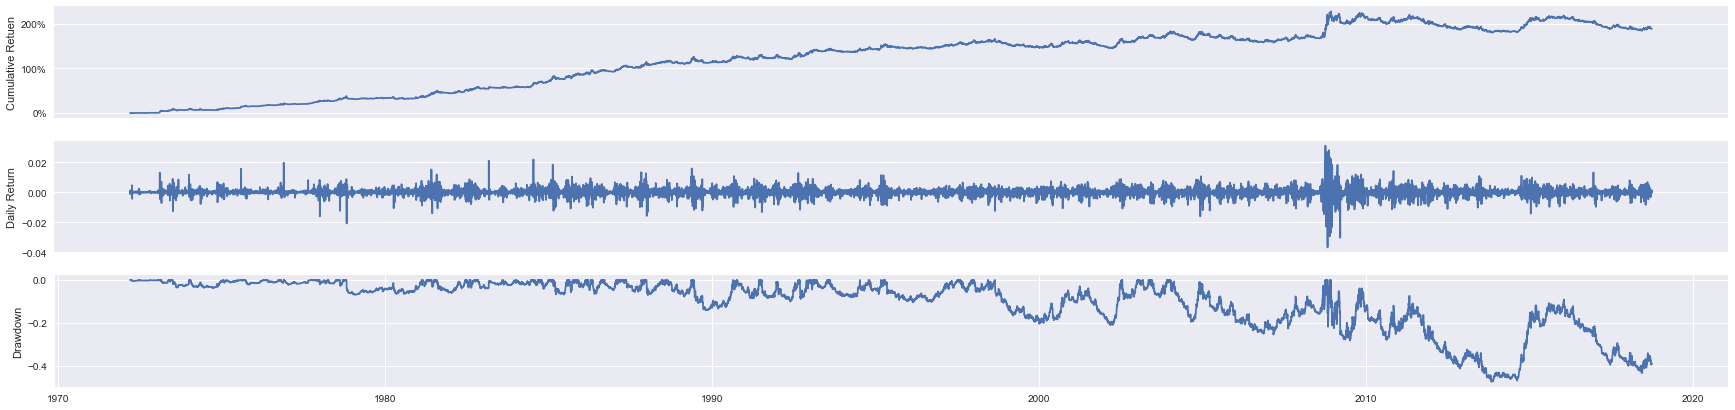

In [18]:
re_a1.figure_plot()

<strong>Cross-sectional Portfolio</strong>

In [14]:
signal_L3=signal_df.apply(lambda x: x.where(x<x.nlargest(3)[2],60),axis=1)
signal_S3=signal_L3.apply(lambda x: x.where(x>x.nsmallest(3)[2],-60),axis=1)
signal_else=signal_S3.apply(lambda x:x.where(np.abs(x)>1,0),axis=1)
position=signal_else/360

return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1

In [15]:
re_a2=result_analysis.result_daily(daily_re)
re_a2.get_metrics()
print(re_a2.ar,re_a2.std,re_a2.sp,re_a2.mdd)

0.0649638399092 0.0605092712298 0.516758600066 -1.33474891703


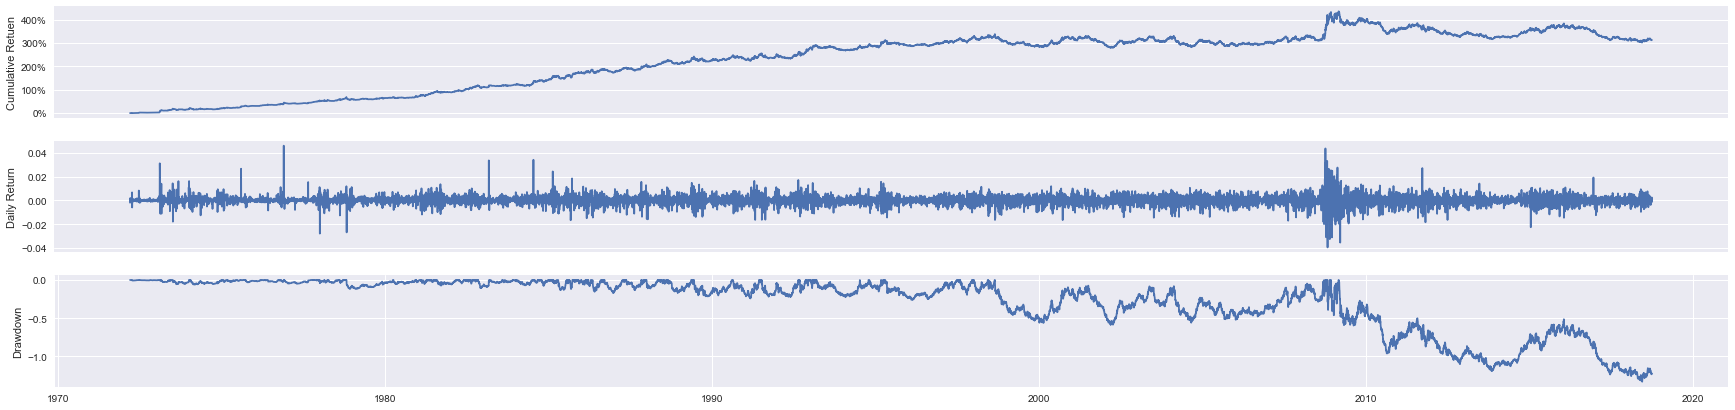

In [19]:
re_a2.figure_plot()

<h3>Emerging Market Currencies</h3>

In [21]:
EMC_daily_category=['DEXMXUS','DEXBZUS','DEXKOUS','DEXINUS','DEXTHUS','DEXSFUS','DEXTAUS']

In [22]:
EMC_daily = get_data.currency()
EMC_daily_category=['DEXMXUS','DEXBZUS','DEXKOUS','DEXINUS','DEXTHUS','DEXSFUS','DEXTAUS']
data_dict=EMC_daily.get_currency(EMC_daily_category)

Try to get your own key, though you can use my key:)

The currency you are downloading are ['DEXMXUS', 'DEXBZUS', 'DEXKOUS', 'DEXINUS', 'DEXTHUS', 'DEXSFUS', 'DEXTAUS']


In [36]:
for i in data_dict.keys():
    print(i,len(data_dict[i]))
    print(data_dict[i].iloc[0,0],data_dict[i].iloc[-1,0])

DEXMXUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXBZUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXKOUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXINUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXTHUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXSFUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00
DEXTAUS 6195
1995-01-02 00:00:00 2018-09-28 00:00:00


In [31]:
start_date=data_dict['DEXBZUS'].iloc[0,0]

In [49]:
for i in data_dict.keys():
    data_dict[i]=data_dict[i][data_dict[i].date>start_date]

In [52]:
for i in range(len(EMC_daily_category)):
    index=EMC_daily_category[i]
    data_dict[index].value.fillna(method='pad',inplace=True)
    #del duplicate data
    dup=data_dict[index].duplicated('date')
    data_dict[index]=data_dict[index][~dup]
    data_dict[index].reset_index(drop=True,inplace=True)

In [57]:
#if date is all the same
for j,k in itertools.combinations(range(len(EMC_daily_category)),2):
    if(sum(data_dict[EMC_daily_category[j]].date!=\
              data_dict[EMC_daily_category[k]].date)>0):
        print('Dates of dataset '+EMC_daily_category[j]+' and '+\
              EMC_daily_category[k]+' are different')
date=data_dict[list(data_dict.keys())[0]].date

In [58]:
signal_class=generate_signals.signal_1(data_dict,period)

In [59]:
signal_class.get_signal()

In [60]:
signal_df=signal_class.signal_df

In [61]:
price_df=pd.DataFrame()
for index in EMC_daily_category:
    price_df[index]=data_dict[index].value
price_df.set_index(date,inplace=True)
price_df=price_df.loc[signal_df.index]

In [62]:
#TS
position=signal_df/7    
#weight=price_df.apply(lambda x:x/np.sum(x),axis=1)
return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)

In [63]:
re_a3=result_analysis.result_daily(daily_re)
re_a3.get_metrics()
print(re_a3.ar,re_a3.std,re_a3.sp,re_a3.mdd)

0.0367220644108 0.0410098091416 0.667278329883 -0.135173924298


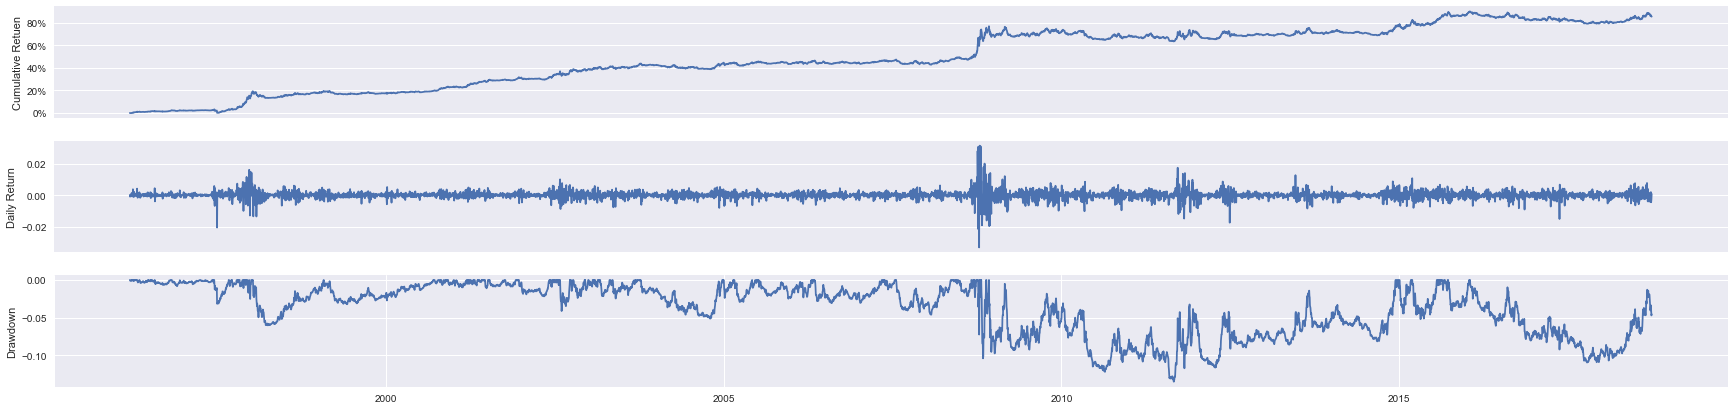

In [64]:
re_a3.figure_plot()

In [65]:
signal_L3=signal_df.apply(lambda x: x.where(x<x.nlargest(3)[2],60),axis=1)
signal_S3=signal_L3.apply(lambda x: x.where(x>x.nsmallest(3)[2],-60),axis=1)
signal_else=signal_S3.apply(lambda x:x.where(np.abs(x)>1,0),axis=1)
position=signal_else/360

return_matrix=(price_df-price_df.shift(1))/price_df.shift(1)
return_sep=position.shift(1)*return_matrix
return_sep=return_sep.dropna()
daily_re=return_sep.sum(axis=1)
daily_cum_re=(daily_re+1).cumprod()-1

In [66]:
re_a4=result_analysis.result_daily(daily_re)
re_a4.get_metrics()
print(re_a4.ar,re_a4.std,re_a4.sp,re_a4.mdd)

0.0119968597651 0.0434635263573 0.265106717365 -0.219670361427


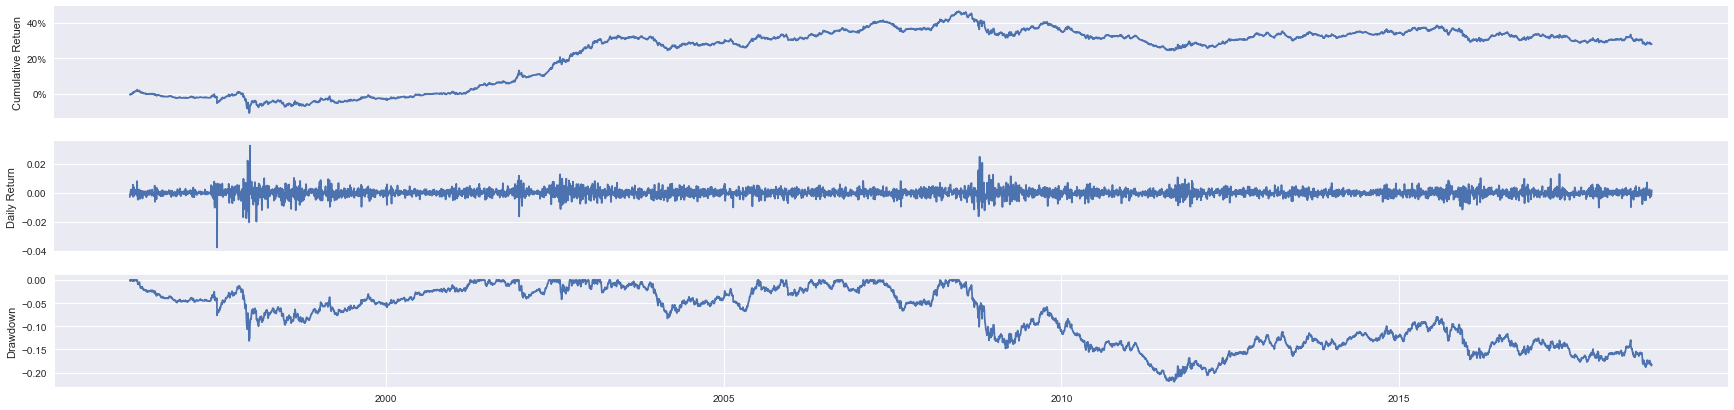

In [67]:
re_a4.figure_plot()